# Homework 1

Load and validate GSS data

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from thinkstats2 import Pmf, Cdf

## Loading and validation


In [2]:
def read_gss(dirname):
    """Reads GSS files from the given directory.
    
    dirname: string
    
    returns: DataFrame
    """
    dct = utils.read_stata_dict(dirname + '/GSS.dct')
    gss = dct.read_fixed_width(dirname + '/GSS.dat.gz',
                             compression='gzip')
    return gss

Read the variables I selected from the GSS dataset.  You can look up these variables at https://gssdataexplorer.norc.org/variables/vfilter

In [3]:
gss = read_gss('gss_eda')
print(gss.shape)
gss.head()

(62466, 101)


,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,1,0,0,3,0,23,16,10,97,...,0,18951.0,1949,0,0,0.4446,1,0,0,1.0
1,1972,2,21,2,4,5,70,10,8,8,...,0,24366.0,1902,1923,0,0.8893,2,0,0,1.0
2,1972,3,20,2,5,4,48,12,8,8,...,0,24366.0,1924,1944,0,0.8893,2,0,0,1.0
3,1972,4,24,2,5,0,27,17,16,12,...,0,30458.0,1945,1969,0,0.8893,2,0,0,1.0
4,1972,5,22,2,2,2,61,12,8,8,...,0,50763.0,1911,1933,0,0.8893,2,0,0,1.0


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [4]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)

replace_invalid(gss)

Here are summary statistics for the variables I have validated and cleaned.

In [5]:
gss['year'].describe()

count    62466.000000
mean      1994.072359
std         12.937941
min       1972.000000
25%       1984.000000
50%       1994.000000
75%       2006.000000
max       2016.000000
Name: year, dtype: float64

In [6]:
gss['sex'].describe()

count    62466.000000
mean         1.558768
std          0.496538
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: sex, dtype: float64

In [7]:
gss['age'].describe()

count    62245.000000
mean        45.991341
std         17.505563
min         18.000000
25%         31.000000
50%         44.000000
75%         59.000000
max         89.000000
Name: age, dtype: float64

In [8]:
gss['cohort'].describe()

count    62245.000000
mean      1948.087075
std         20.998696
min       1883.000000
25%       1934.000000
50%       1950.000000
75%       1963.000000
max       1998.000000
Name: cohort, dtype: float64

In [9]:
gss['race'].describe()

count    62466.000000
mean         1.247335
std          0.540917
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: race, dtype: float64

In [10]:
gss['educ'].describe()

count    62292.000000
mean        12.837234
std          3.179130
min          0.000000
25%         12.000000
50%         12.000000
75%         15.000000
max         20.000000
Name: educ, dtype: float64

In [11]:
gss['realinc'].describe()

count     56141.000000
mean      31636.199666
std       29402.370825
min         234.000000
25%       12080.625000
50%       24097.500000
75%       39022.500000
max      162607.000000
Name: realinc, dtype: float64

In [12]:
gss['wtssall'].describe()

count    62466.000000
mean         1.000016
std          0.461927
min          0.391825
25%          0.550100
50%          0.988100
75%          1.098500
max          8.739876
Name: wtssall, dtype: float64

**Exercise** 

1. Look through the column headings to find a few variables that look interesting.  Look them up on the GSS data explorer.  

2. Use `value_counts` to see what values appear in the dataset, and compare the results with the counts in the code book.  

3. Identify special values that indicate missing data and replace them with `NaN`.

4. Use `describe` to compute summary statistics.  What do you notice?

In [17]:
# Number of Brothers and Sisters
sibs = gss['sibs']
sibs.value_counts()

 2     11313
 1     10152
 3      9561
 4      7024
 5      5066
 6      3849
 7      3296
 0      3047
 8      2165
 9      1608
-1      1518
 10     1105
 11      865
 12      577
 13      393
 14      220
 15      146
 99      114
 16      108
 98       59
 17       52
 21       49
 18       44
 20       31
 19       25
 22       17
 23       15
 27        7
 26        6
 25        6
 31        6
 24        5
 30        4
 29        2
 33        2
 32        2
 37        1
 68        1
 55        1
 35        1
 28        1
 43        1
 34        1
Name: sibs, dtype: int64

In [39]:
def replace_invalid(df):
    df.replace([-1,99,98], np.nan, inplace=True)                  
   

In [40]:
replace_invalid_values(sibs)

In [41]:
sibs.value_counts().sort_index()

1.0     10152
2.0     11313
3.0      9561
4.0      7024
5.0      5066
6.0      3849
7.0      3296
8.0      2165
9.0      1608
10.0     1105
11.0      865
12.0      577
13.0      393
14.0      220
15.0      146
16.0      108
17.0       52
18.0       44
19.0       25
20.0       31
21.0       49
22.0       17
23.0       15
24.0        5
25.0        6
26.0        6
27.0        7
28.0        1
29.0        2
30.0        4
31.0        6
32.0        2
33.0        2
34.0        1
35.0        1
37.0        1
43.0        1
55.0        1
68.0        1
Name: sibs, dtype: int64

In [42]:
sibs.describe()

count    57728.000000
mean         4.129175
std          3.133911
min          1.000000
25%          2.000000
50%          3.000000
75%          6.000000
max         68.000000
Name: sibs, dtype: float64

In [59]:
# The max is extremely different than all of the other quartiles.
# Seems pretty skewed to the left

In [43]:
gss.columns

Index(['year', 'id_', 'agewed', 'divorce', 'sibs', 'childs', 'age', 'educ',
       'paeduc', 'maeduc',
       ...
       'memchurh', 'realinc', 'cohort', 'marcohrt', 'ballot', 'wtssall',
       'adults', 'compuse', 'databank', 'wtssnr'],
      dtype='object', length=101)

In [44]:
# Mother's Highest Degree
mothers_degree = gss['madeg']
mothers_degree.value_counts()

1    24169
0    23073
7     3955
3     3895
8     3374
2     1770
4     1544
9      686
Name: madeg, dtype: int64

In [45]:
def replace_invalid(df):
    df.replace([7,8,9], np.nan, inplace=True)    

In [46]:
replace_invalid(mothers_degree)

In [47]:
mothers_degree.value_counts().sort_index()

0.0    23073
1.0    24169
2.0     1770
3.0     3895
4.0     1544
Name: madeg, dtype: int64

In [48]:
mothers_degree.describe()

count    54451.000000
mean         0.836899
std          0.985389
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: madeg, dtype: float64

In [60]:
# Clump around 0 and 1
# This is pretty similar to what I would have expectted

In [61]:
party = gss['partyid']
party.value_counts()

1.0    12942
0.0     9999
5.0     9661
3.0     9474
2.0     7485
6.0     6063
4.0     5462
Name: partyid, dtype: int64

In [62]:
def replace_invalid(df):
    df.replace([7,8,9], np.nan, inplace=True)  

In [63]:
replace_invalid(party)

In [64]:
party.value_counts().sort_index()

0.0     9999
1.0    12942
2.0     7485
3.0     9474
4.0     5462
5.0     9661
6.0     6063
Name: partyid, dtype: int64

In [65]:
party.describe()

count    61086.000000
mean         2.666159
std          1.986733
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: partyid, dtype: float64

In [66]:
# The distribution makes a lot of sense and seems realistic
# Definitly leaning more towards democrat size given the mean

## Visualize distributions

Let's visualize the distributions of the variables we've selected.

Here's a Hist of the values in `educ`:

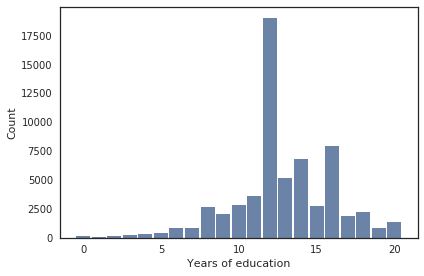

In [67]:
from thinkstats2 import Hist, Pmf, Cdf
import thinkplot

hist_educ = Hist(gss.educ)
thinkplot.hist(hist_educ)
decorate(xlabel='Years of education', 
         ylabel='Count')

`Hist` as defined in `thinkstats2` is different from `hist` as defined in Matplotlib.  The difference is that `Hist` keeps all unique values and does not put them in bins.  Also, `hist` does not handle `NaN`.

One of the hazards of using `hist` is that the shape of the result depends on the bin size.

**Exercise:** 

1. Run the following cell and compare the result to the `Hist` above.

2. Add the keyword argument `bins=11` to `plt.hist` and see how it changes the results.

3. Experiment with other numbers of bins.

In [14]:
import matplotlib.pyplot as plt

plt.hist(gss.educ.dropna())
decorate(xlabel='Years of education', 
         ylabel='Count')

However, a drawback of `Hist` and `Pmf` is that they basically don't work when the number of unique values is large, as in this example:

In [15]:
hist_realinc = Hist(gss.realinc)
thinkplot.hist(hist_realinc)
decorate(xlabel='Real income (1986 USD)', 
         ylabel='Count')

**Exercise:**
    
1. Make and plot a `Hist` of `age`.

2. Make and plot a `Pmf` of `educ`.

3. What fraction of people have 12, 14, and 16 years of education?

In [16]:
# Solution goes here

In [17]:
# Solution goes here

In [18]:
# Solution goes here

In [19]:
# Solution goes here

In [20]:
# Solution goes here

**Exercise:**
    
1. Make and plot a `Cdf` of `educ`.

2. What fraction of people have more than 12 years of education?

In [21]:
# Solution goes here

In [22]:
# Solution goes here

In [23]:
# Solution goes here

**Exercise:**
    
1. Make and plot a `Cdf` of `age`.

2. What is the median age?  What is the inter-quartile range (IQR)?

In [24]:
# Solution goes here

In [25]:
# Solution goes here

In [26]:
# Solution goes here

**Exercise:**

Find another numerical variable, plot a histogram, PMF, and CDF, and compute any statistics of interest.

In [27]:
# Solution goes here

In [28]:
# Solution goes here

In [29]:
# Solution goes here

In [30]:
# Solution goes here

**Exercise:**

1. Compute the CDF of `realinc` for male and female respondents, and plot both CDFs on the same axes.

2. What is the difference in median income between the two groups?

In [31]:
# Solution goes here

In [32]:
# Solution goes here

In [33]:
# Solution goes here

In [34]:
# Solution goes here

**Exercise:**

Use a variable to break the dataset into groups and plot multiple CDFs to compare distribution of something within groups.

Note: Try to find something interesting, but be cautious about overinterpreting the results.  Between any two groups, there are often many differences, with many possible causes.

In [35]:
# Solution goes here

In [36]:
# Solution goes here

In [37]:
# Solution goes here

In [38]:
# Solution goes here

## Save the cleaned data

Now that we have the data in good shape, we'll save it in a binary format (HDF5), which will make it faster to load later.

Also, we have to do some resampling to make the results representative.  We'll talk about this in class.

In [39]:
np.random.seed(19)
sample = utils.resample_by_year(gss, 'wtssall')

Save the file.

In [40]:
!rm gss.hdf5
sample.to_hdf('gss.hdf5', 'gss')

Load it and see how fast it is!

In [41]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape